In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [82]:
test_titanic=pd.read_csv("test.csv")
test_titan=test_titanic.copy()

titanic = pd.read_csv("train.csv")
titan=titanic.copy()

In [83]:
test_titan

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [84]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [85]:
def dfislemler(titan):
    #1,2 ve üçüncü class yolcular için Cabin oransal dağılımları
    FOranlar = {
        "A": .11,
        "B": .32,
        "C": .42,
        "D": .15,
    }
    SOranlar = {
        "D": .23,
        "E": .39,
        "F": .38,
    }
    TOranlar = {
        "G": 1,
    }
    height= {
        "A": 10,
        "B": 20,
        "C": 30,
        "D": 40,
        "E": 50,
        "F": 60,
        "G": 70,
        "T": 10,
    }

    olas=[FOranlar,SOranlar,TOranlar]
        
    ##isimdeki kelime sayısını buluyor
    titan["Alphabet_Num"] = titan["Name"].str.len()

    ##boş yaşları ortalamalarla değiştiriyor
    ort = np.mean(titan["Age"])
    titan["Age"] = titan["Age"].fillna(ort)

    ## Cabin Harflerini Belirliyor
    titan["Cabin"]=titan["Cabin"].fillna("0")
    m = titan["Cabin"].shape[0]
    for i in range(m): 
        for c in titan["Cabin"][i]:
            if c.isalpha():
                titan["Cabin"][i]=c

    #İnternetten aldığım verilere göre 1st 2nd 3rd seviye yolcuların odalarda olma ihtimaline göre dağılım
    class_num=len(pd.unique(titan["Pclass"]))
    

    for k in range(class_num):

        total_each_cabin= titan.loc[(titan["Pclass"]==k+1) & (titan["Cabin"]=="0")].shape[0]
        cabin_left=total_each_cabin

        for i,j in olas[k].items():

            sample=int(np.round(total_each_cabin*j))

            
            if cabin_left < sample:
                titan.iloc[titan.loc[(titan["Pclass"]==k+1) & (titan["Cabin"]=="0")].sample(cabin_left).index.values,list(titan.columns).index("Cabin")]=i
                
            else:
                cabin_left= cabin_left-sample
                titan.iloc[titan.loc[(titan["Pclass"]==k+1) & (titan["Cabin"]=="0")].sample(sample).index.values,list(titan.columns).index("Cabin")]=i
                

    ##Height adında bi bölüm oluşturup, geminin en yukarısından en aşağısını numaralandırıyor
    titan["height"]=np.NaN
    for i,j in height.items():
        tmp=titan.loc[titan["Cabin"]==i]
        tmp["height"]= tmp["height"].fillna(j)
        titan.loc[titan["Cabin"]==i]=tmp

    #Yeni bir Feature
    titan["heightsqrd"]=titan["height"]**2

    #Cabinleri ve Sexleri ayırma 
    titan = pd.get_dummies(titan, columns=["Sex"])
    titan = pd.get_dummies(titan, columns=["Cabin"])

    return titan


In [ ]:
titan =dfislemler(titan)
test_titan =dfislemler(test_titan)

In [87]:
test_titan.columns

Index(['PassengerId', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'Alphabet_Num', 'height', 'heightsqrd',
       'Sex_female', 'Sex_male', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G'],
      dtype='object')

In [88]:
test_titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   418 non-null    int64  
 1   Pclass        418 non-null    int64  
 2   Name          418 non-null    object 
 3   Age           418 non-null    float64
 4   SibSp         418 non-null    int64  
 5   Parch         418 non-null    int64  
 6   Ticket        418 non-null    object 
 7   Fare          417 non-null    float64
 8   Embarked      418 non-null    object 
 9   Alphabet_Num  418 non-null    int64  
 10  height        418 non-null    float64
 11  heightsqrd    418 non-null    float64
 12  Sex_female    418 non-null    bool   
 13  Sex_male      418 non-null    bool   
 14  Cabin_A       418 non-null    bool   
 15  Cabin_B       418 non-null    bool   
 16  Cabin_C       418 non-null    bool   
 17  Cabin_D       418 non-null    bool   
 18  Cabin_E       418 non-null    

In [89]:
test_titan["Fare"]=test_titan["Fare"].fillna(np.mean(test_titan["Fare"]))

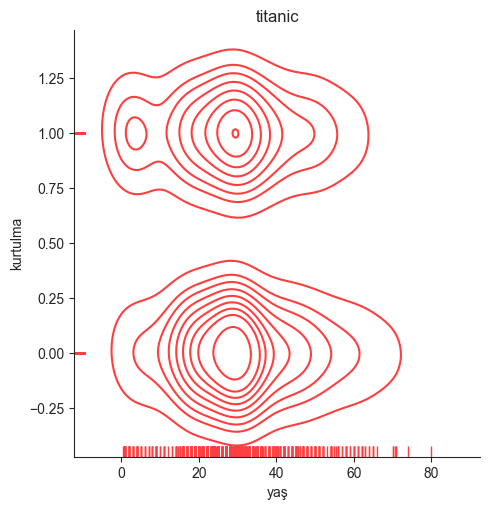

In [90]:
sns.displot(titan, x = "Age", y = "Survived", kind = "kde", rug = True, color = "#FF3F3F")
plt.ylabel("kurtulma")
plt.xlabel("yaş")
plt.title("titanic")
plt.show()

In [91]:
titancorr=titan[['Pclass', 'Age', 'SibSp', 'Parch', 
       'Fare', 'Alphabet_Num', 'height', 'heightsqrd',
       'Sex_female', 'Sex_male', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G',"Survived"]]
titancorr.corr()

,Pclass,Age,SibSp,Parch,Fare,Alphabet_Num,height,heightsqrd,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Survived
Pclass,1.000000,-0.331339,0.083081,0.018443,-0.549500,-0.220001,0.927723,0.951597,-0.131900,0.131900,-0.231175,-0.420820,-0.478244,-0.280740,-0.220341,-0.104588,0.906346,-0.338481
Age,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.031533,-0.301466,-0.306252,-0.084153,0.084153,0.115514,0.099718,0.157997,0.106588,0.078924,-0.016048,-0.276517,-0.069809
SibSp,0.083081,-0.232625,1.000000,0.414838,0.159651,0.165019,0.080109,0.082737,0.114631,-0.114631,-0.041852,-0.042180,0.004562,-0.017275,-0.051125,-0.039818,0.095750,-0.035322
Parch,0.018443,-0.179191,0.414838,1.000000,0.216225,0.252282,0.021261,0.020639,0.245489,-0.245489,-0.040988,0.022817,-0.000006,-0.033343,-0.012314,0.028244,0.012718,0.081629
Fare,-0.549500,0.091566,0.159651,0.216225,1.000000,0.155832,-0.537289,-0.528978,0.182333,-0.182333,0.060626,0.370139,0.372788,0.084638,-0.022989,-0.069880,-0.408437,0.257307
Alphabet_Num,-0.220001,0.031533,0.165019,0.252282,0.155832,1.000000,-0.201840,-0.207213,0.448759,-0.448759,0.060854,0.081631,0.121127,0.026847,0.062923,0.042397,-0.205099,0.332350
height,0.927723,-0.301466,0.080109,0.021261,-0.537289,-0.201840,1.000000,0.988118,-0.106842,0.106842,-0.377273,-0.538177,-0.442743,-0.277793,-0.121567,0.062016,0.834910,-0.307120
heightsqrd,0.951597,-0.306252,0.082737,0.020639,-0.528978,-0.207213,0.988118,1.000000,-0.116975,0.116975,-0.289649,-0.480569,-0.457699,-0.338654,-0.202230,0.019334,0.896364,-0.320446
Sex_female,-0.131900,-0.084153,0.114631,0.245489,0.182333,0.448759,-0.106842,-0.116975,1.000000,-1.000000,-0.027579,0.083013,0.043876,0.029192,0.038209,0.074360,-0.138116,0.543351
Sex_male,0.131900,0.084153,-0.114631,-0.245489,-0.182333,-0.448759,0.106842,0.116975,-1.000000,1.000000,0.027579,-0.083013,-0.043876,-0.029192,-0.038209,-0.074360,0.138116,-0.543351


In [92]:
#X test ve X'in parametreleri hazırlanıyor, feature scale'leri yapılıyor
X=titan[['Pclass', 'Age', 'SibSp', 'Parch',
        'Fare', 'height', 'Sex_female', 'Sex_male',
       'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G',"heightsqrd","Alphabet_Num"]].values
       
X_test=test_titan[['Pclass', 'Age', 'SibSp', 'Parch',
        'Fare', 'height', 'Sex_female', 'Sex_male',
       'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G',"heightsqrd","Alphabet_Num"]].values

m,n = X.shape

scaler_poly = StandardScaler()
X = scaler_poly.fit_transform(X)
X_test = scaler_poly.fit_transform(X_test)

y=titan[["Survived"]].values
y=y.reshape(m,)

lr_model = LogisticRegression()
lr_model.fit(X, y)

LogisticRegression()

In [93]:
##Prediction Yapılıyor

y_pred = lr_model.predict(X_test)

print("Prediction on training set:", y_pred)
print("Accuracy on training set:", lr_model.score(X, y))


Prediction on training set: [0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
Accuracy on training set: 0.8047138047138047


In [94]:
realtest=pd.read_csv("gender_submission.csv")

In [95]:
result = pd.merge(realtest, test_titan[["PassengerId"]], on='PassengerId', how="inner")

In [96]:
np.abs(result["Survived"]-y_pred).sum()

21

In [97]:
y=y.reshape(891,1)
X = np.asarray(X).astype(np.float32)
y = np.asarray(y).astype(np.float32)

In [98]:
def deeplearn(X,y,epochs):
    model = Sequential(
        [ 
            Dense(25, activation = 'relu'),
            Dense(50, activation = 'relu'),
            Dense(10, activation = 'relu'),
            Dense(1, activation = 'sigmoid')    
        ]
    )
    model.compile(
        loss=tf.keras.losses.BinaryCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(0.001),
    )

    model.fit(
        X, y,
        epochs=epochs
    )
    return model
        

In [99]:
epocs=[10,20,30,40,50,60]
models=[]
preds=[]
loss=[]

In [100]:
for i in range(len(epocs)):
    model = deeplearn(X,y,epocs[i])
    predictions = model.predict(X_test)
    yhat = np.zeros_like(predictions)
    m , n=predictions.shape
    yhat=yhat.reshape(m,)
    for i in range(len(predictions)):
        if predictions[i] >= 0.5:
            yhat[i] = 1
        else:
            yhat[i] = 0
    los=(np.abs(result["Survived"]-yhat)).sum()

    models.append(model)
    preds.append(predictions)
    loss.append(los)

Epoch 1/10


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6751
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5490 
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4743 
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4461 
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4166 
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4528 
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3979 
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4040 
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4036 
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4051 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7207
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6433
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5986 
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5395 
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

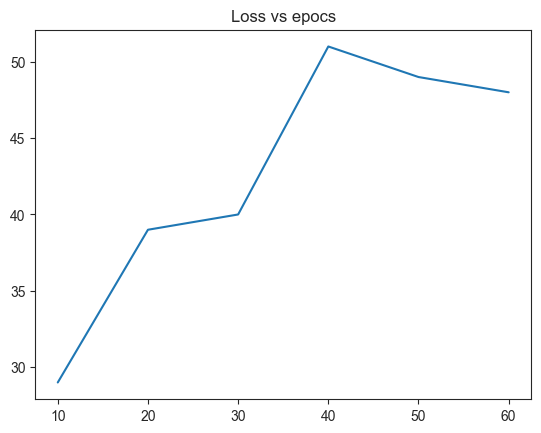

In [101]:
sns.lineplot(x = epocs, y = loss)
plt.title("Loss vs epocs")
sns.set_style("ticks")
plt.show()

In [102]:
loss ##10-30 epocs is optimum if deep learning is used

[29.0, 39.0, 40.0, 51.0, 49.0, 48.0]

In [103]:
## elimizdeki en iyi sonuç logisticregression'dan olduğu için cevap olarak onu kullanıyoruz
data = {'PassengerId': result["PassengerId"].values,
        'Survived': y_pred,
        }
Final = pd.DataFrame(data)

Final.to_csv("Final.csv",index=False)